# Compare pseudobulks

The pseudobulks have been simulated with the Scaden-based technique and reduced to the 3k most highly variable genes.

Note: single-cells have been CPM-normalized prior to pseudobulk generation

Questions:

1. Does scaling after subsetting affect pseudobulk quality?

2. Are the 3k most highly variable genes sufficient or even better to indicate pseudobulk proportions?

In [6]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import umap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Import data

In [2]:
only3k = pd.read_csv('/ceph/ibmi/it/projects/ML_BI/03_Convolution_tools/Scaden_pseudobulk_simulator/2025-02-01_Simulation_test/2025_02_01_Hao_noTregs_pseudobulks_3k_var_genes.csv', index_col = 0)
only3k_scaled = pd.read_csv('/ceph/ibmi/it/projects/ML_BI/03_Convolution_tools/Scaden_pseudobulk_simulator/2025-02-01_Simulation_test/2025_02_01_Hao_noTregs_pseudobulks_3k_var_genes_scaled.csv', index_col = 0)
props = pd.read_csv('/ceph/ibmi/it/projects/ML_BI/03_Convolution_tools/Scaden_pseudobulk_simulator/2025-02-01_Simulation_test/2025_02_01_Hao_noTregs_pseudobulk_proprotions.csv', index_col = 0)

In [3]:
only3k

HES4  LINC01342   TNFRSF18    TNFRSF4     MXRA8   ANKRD65  \
Sample_1     12.125162   0.518022   8.391989  16.868692  0.119528  0.213650   
Sample_2     24.476962   0.000000   5.503702   8.546407  0.916400  0.000000   
Sample_3      8.559745   0.232017  10.213865  17.253580  1.456916  0.000000   
Sample_4     17.536231   0.630366   4.821466  11.025694  0.433191  0.039818   
Sample_5      6.166957   0.668272   4.870181   5.416655  0.000000  0.054305   
...                ...        ...        ...        ...       ...       ...   
Sample_4996  11.676330   0.177597  19.219774  12.977057  0.000000  1.121463   
Sample_4997   9.406785   0.000000   7.943549  10.365606  0.389533  0.437714   
Sample_4998  17.778084   0.000000  20.153945  10.260826  0.436636  0.066903   
Sample_4999   8.100072   0.000000  12.144118   9.845662  0.301909  0.246661   
Sample_5000   8.190035   0.000000  26.825779   9.922415  2.464540  0.163708   

                MMP23B       NADK  AC242022.1    PRDM16  ...  AP001059.2  \
Sample_1      1.654323  29.433262         0.0  0.000000  ...    3.595368   
Sample_2      5.126559  49.079569         0.0  0.089972  ...    0.697595   
Sample_3      2.459803  21.261394         0.0  0.000000  ...    0.519156   
Sample_4      1.008412  49.222361         0.0  0.000000  ...    3.436517   
Sample_5      2.242159  30.194613         0.0  0.213611  ...    7.850997   
...                ...        ...         ...       ...  ...         ...   
Sample_4996  10.390788  27.997482         0.0  0.000000  ...    0.709321   
Sample_4997   3.966738  26.274512         0.0  0.000000  ...    3.529443   
Sample_4998  11.227367  35.214857         0.0  0.000000  ...    0.571660   
Sample_4999   5.950105  26.211599         0.0  0.000000  ...    0.832936   
Sample_5000  21.388667  23.150065         0.0  0.000000  ...    0.420536   

             AP001059.1       ITGB2   SLC19A1     COL6A2       DIP2A  \
Sample_1       0.000000  238.528439  6.433122   2.267650   48.185702   
Sample_2       0.000000  443.202811  8.380360   9.295566   58.446572   
Sample_3       0.208699  228.439886  3.555228   9.825854   64.484911   
Sample_4       0.656418  361.034904  5.982856   3.944067   42.096319   
Sample_5       1.434189  202.434336  4.511982   4.514043   40.956737   
...                 ...         ...       ...        ...         ...   
Sample_4996    0.000000  482.478787  6.448864  10.877416   83.333120   
Sample_4997    0.895626  261.566347  5.589721   6.704232   54.426025   
Sample_4998    0.000000  457.937413  8.340047  15.910953   86.873736   
Sample_4999    0.076037  295.289853  4.649528  14.214599   77.801419   
Sample_5000    0.442068  341.375984  1.593754  30.575255  124.840801   

                 S100B  AC011043.1  AC233755.2  AC233755.1  
Sample_1      6.087092    0.171797    0.000000    0.457881  
Sample_2     26.870864    0.070003    0.000000    0.000000  
Sample_3     13.819818    0.251773    0.000000    0.000000  
Sample_4      6.630265    0.425406    0.096092    0.568417  
Sample_5     10.699417    0.198027    1.080704    1.436441  
...                ...         ...         ...         ...  
Sample_4996  18.608765    1.519520    0.000000    0.453806  
Sample_4997  20.832816    0.000000    0.268113    0.248774  
Sample_4998  25.132783    0.187221    0.000000    0.000000  
Sample_4999  37.669826    0.788177    0.000000    0.000000  
Sample_5000  65.674672    1.151820    0.000000    0.000000  

[5000 rows x 3000 columns]

In [4]:
only3k_scaled

HES4  LINC01342    TNFRSF18     TNFRSF4      MXRA8  \
Sample_1     109.713784   4.687293   75.934404  152.635326   1.081543   
Sample_2     160.699892   0.000000   36.133747   56.110178   6.016488   
Sample_3      98.197443   2.661699  117.173523  197.933167  16.713744   
Sample_4     119.580785   4.298508   32.877913   75.184980   2.953962   
Sample_5      57.575921   6.239118   45.468963   50.570952   0.000000   
...                 ...        ...         ...         ...        ...   
Sample_4996   85.114004   1.294586  140.101558   94.595590   0.000000   
Sample_4997   83.459709   0.000000   70.477462   91.966644   3.456053   
Sample_4998  126.305413   0.000000  143.184854   72.898620   3.102107   
Sample_4999   78.200184   0.000000  117.242441   95.052557   2.914708   
Sample_5000   86.603116   0.000000  283.661311  104.921663  26.060558   

              ANKRD65      MMP23B        NADK  AC242022.1    PRDM16  ...  \
Sample_1     1.933200   14.969043  266.325074         0.0  0.000000  ...   
Sample_2     0.000000   33.657671  322.224685         0.0  0.590699  ...   
Sample_3     0.000000   28.218878  243.910836         0.0  0.000000  ...   
Sample_4     0.271520    6.876435  335.650731         0.0  0.000000  ...   
Sample_5     0.507000   20.933232  281.902835         0.0  1.994312  ...   
...               ...         ...         ...         ...       ...  ...   
Sample_4996  8.174844   75.743116  204.086202         0.0  0.000000  ...   
Sample_4997  3.883522   35.194043  233.115052         0.0  0.000000  ...   
Sample_4998  0.475316   79.765467  250.185960         0.0  0.000000  ...   
Sample_4999  2.381327   57.443848  253.053531         0.0  0.000000  ...   
Sample_5000  1.731085  226.168178  244.793554         0.0  0.000000  ...   

             AP001059.2  AP001059.1        ITGB2    SLC19A1      COL6A2  \
Sample_1      32.532472    0.000000  2158.310012  58.209713   20.518693   
Sample_2       4.579960    0.000000  2909.782831  55.020023   61.028669   
Sample_3       5.955759    2.394200  2620.663697  40.785600  112.722257   
Sample_4      23.433850    4.476159  2461.922311  40.797515   26.894872   
Sample_5      73.298447   13.389867  1889.966718  42.124754   42.143989   
...                 ...         ...          ...        ...         ...   
Sample_4996    5.170562    0.000000  3517.004308  47.008660   79.290362   
Sample_4997   31.314236    7.946256  2320.692104  49.593622   59.481882   
Sample_4998    4.061392    0.000000  3253.442467  59.252342  113.040274   
Sample_4999    8.041379    0.734084  2850.804345  44.887741  137.231398   
Sample_5000    4.446835    4.674520  3609.780017  16.852679  323.309048   

                   DIP2A       S100B  AC011043.1  AC233755.2  AC233755.1  
Sample_1      436.005380   55.078678    1.554498    0.000000    4.143107  
Sample_2      383.722365  176.416704    0.459597    0.000000    0.000000  
Sample_3      739.771279  158.541030    2.888347    0.000000    0.000000  
Sample_4      287.057747   45.212242    2.900873    0.655259    3.876072  
Sample_5      382.380143   99.891859    1.848823   10.089660   13.410897  
...                  ...         ...         ...         ...         ...  
Sample_4996   607.452490  135.647637   11.076462    0.000000    3.307997  
Sample_4997   482.883394  184.834752    0.000000    2.378772    2.207196  
Sample_4998   617.199413  178.557293    1.330121    0.000000    0.000000  
Sample_4999   751.114951  363.674204    7.609260    0.000000    0.000000  
Sample_5000  1320.092364  694.457516   12.179580    0.000000    0.000000  

[5000 rows x 3000 columns]

In [5]:
props

B cells  Monocytes  NK cells  T cells CD4 conv  T cells CD8  \
Sample_1     0.381764   0.191383  0.013026          0.369739     0.025050   
Sample_2     0.063190   0.456369  0.028084          0.138415     0.287864   
Sample_3     0.037111   0.112337  0.023069          0.612839     0.203611   
Sample_4     0.275827   0.395186  0.017051          0.276830     0.020060   
Sample_5     0.554664   0.130391  0.002006          0.169509     0.116349   
...               ...        ...       ...               ...          ...   
Sample_4996  0.061122   0.108216  0.242485          0.128257     0.025050   
Sample_4997  0.353059   0.157472  0.033099          0.263791     0.117352   
Sample_4998  0.028084   0.298897  0.186560          0.191575     0.165496   
Sample_4999  0.091274   0.148445  0.070211          0.227683     0.408225   
Sample_5000  0.073220   0.067202  0.278837          0.007021     0.567703   

                  mDC  
Sample_1     0.019038  
Sample_2     0.026078  
Sample_3     0.011033  
Sample_4     0.015045  
Sample_5     0.027081  
...               ...  
Sample_4996  0.434870  
Sample_4997  0.075226  
Sample_4998  0.129388  
Sample_4999  0.054162  
Sample_5000  0.006018  

[5000 rows x 6 columns]

## Unsupervised learning to see how proportions are reflected in embeddings

In [11]:
# Function for scattering data and coloring
# Define the function

def clusterCellTypeAbundance(df, metadata, cellType, scaled):
    metadata = metadata
    metadata['ID'] = metadata.index.tolist()
    metaData_final = metadata

    fig, axs = plt.subplots(2,2, figsize = (10,10))
    axs[1,1].axis('off')
    # plt.subplots_adjust(hspace=0.15)
    plt.suptitle('Analysis of ' + str(scaled) + ' pseudobulks for abundance of ' + str(cellType), fontweight = 'bold', fontsize = 'x-large')
    plt.subplots_adjust(left=0.05, bottom=0.1, right=0.95, top=0.9, wspace=0.45,hspace=0.4)

    pca = PCA(n_components = 2)
    components = pca.fit_transform(df)
    pca.fit(df)

    labels = metaData_final[cellType]
    X = pd.DataFrame(pd.concat([pd.DataFrame(components, index=metaData_final['ID']), pd.DataFrame(labels, index=metaData_final['ID'])], axis = 1, ignore_index=False))
    X.columns = ["Dim1", "Dim2", cellType]
    sns.scatterplot(ax = axs[0,0], x = "Dim1", y = "Dim2", data = X, hue = cellType, legend = False, size = 0.5)
    axs[0,0].set_title('PCA')
    axs[0,0].set_xlabel("Dim 1 (explained variance " + str(round(pca.explained_variance_ratio_[0] *100, ndigits=2)) + " %)")
    axs[0,0].set_ylabel("Dim 2 (explained variance " + str(round(pca.explained_variance_ratio_[1] *100, ndigits=2)) + " %)")


    fit = umap.UMAP()
    u = fit.fit_transform(df)

    labels = metaData_final[cellType]
    X = pd.DataFrame(pd.concat([pd.DataFrame(u, index=metaData_final['ID']), pd.DataFrame(labels, index=metaData_final['ID'])], axis = 1, ignore_index=False))
    X.columns = ["Dim1", "Dim2", cellType]
    sns.scatterplot(ax = axs[0,1], x = "Dim1", y = "Dim2", data = X, hue = cellType, legend = False, size = 0.5)
    axs[0,1].set_title('UMAP')

    u = TSNE(n_components = 2, learning_rate = 'auto', init = 'random', perplexity = 30).fit_transform(df)
    labels = metaData_final[cellType]
    X = pd.DataFrame(pd.concat([pd.DataFrame(u, index=metaData_final['ID']), pd.DataFrame(labels, index=metaData_final['ID'])], axis = 1, ignore_index=False))
    X.columns = ["Dim1", "Dim2", cellType]
    sns.scatterplot(ax = axs[1,0], x = "Dim1", y = "Dim2", data = X, hue = cellType, size = 0.5)
    sns.move_legend(axs[1,0], "upper left", bbox_to_anchor=(1, 1), ncol = 4, title = 'Sample annotation')
    axs[1,0].set_title('t-SNE')

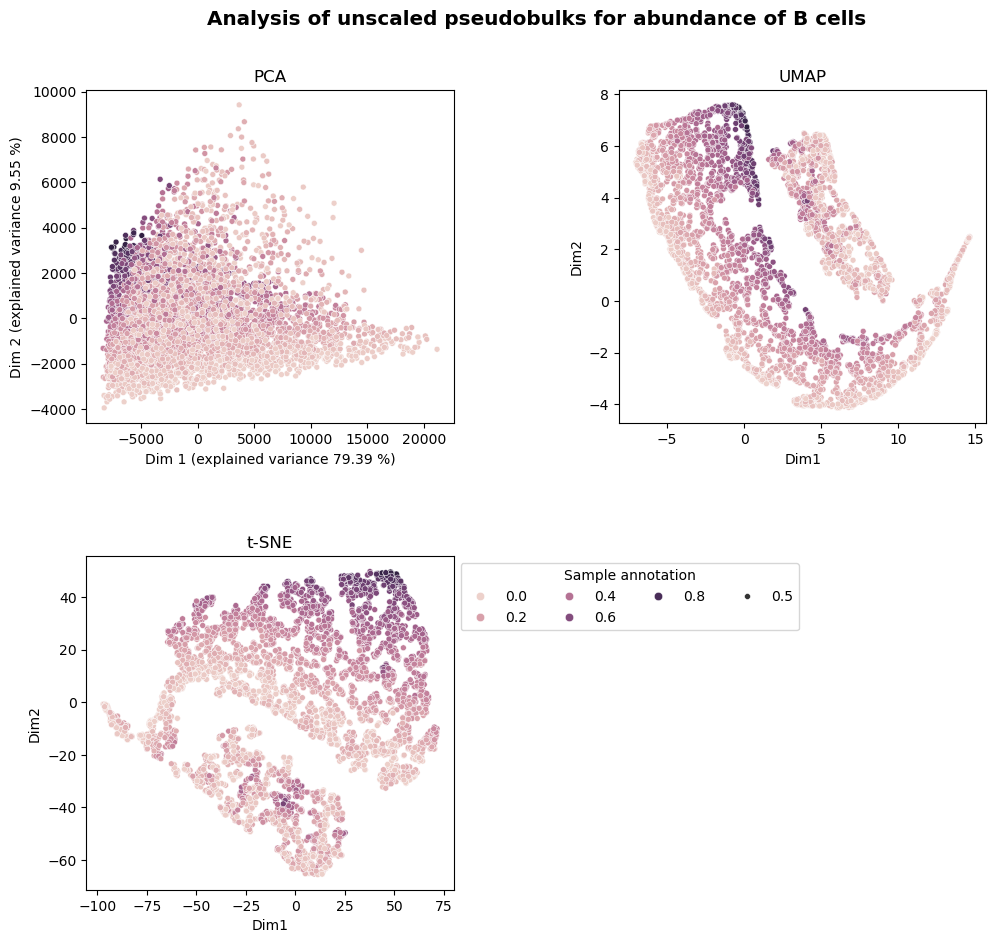

In [12]:
clusterCellTypeAbundance(only3k, props, 'B cells', 'unscaled')

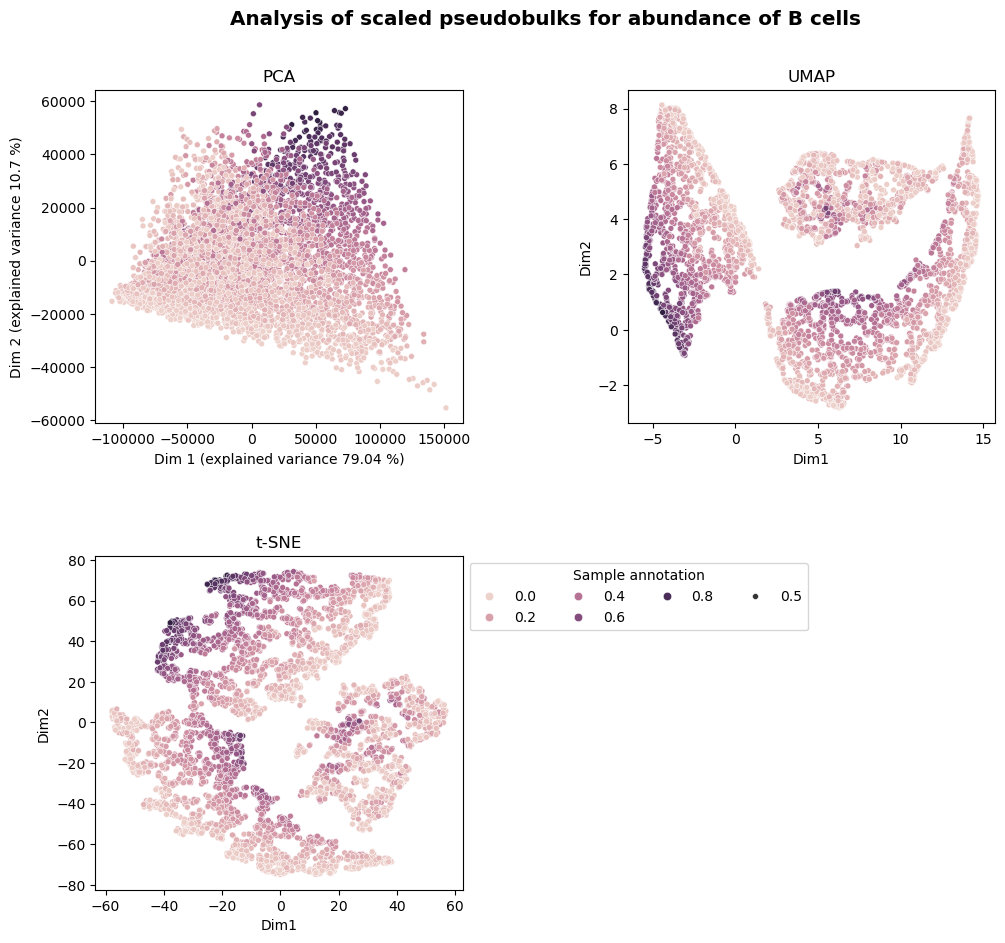

In [13]:
clusterCellTypeAbundance(only3k_scaled, props, 'B cells', 'scaled')

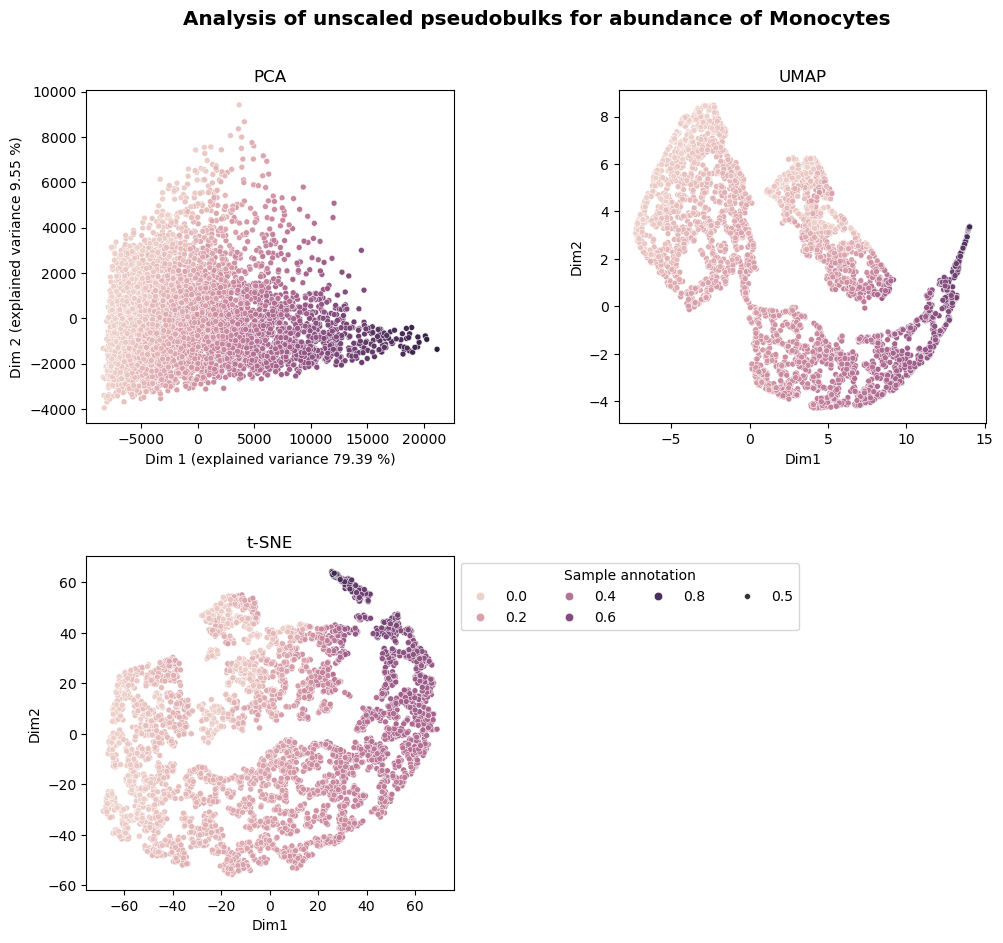

In [14]:
clusterCellTypeAbundance(only3k, props, 'Monocytes', 'unscaled')

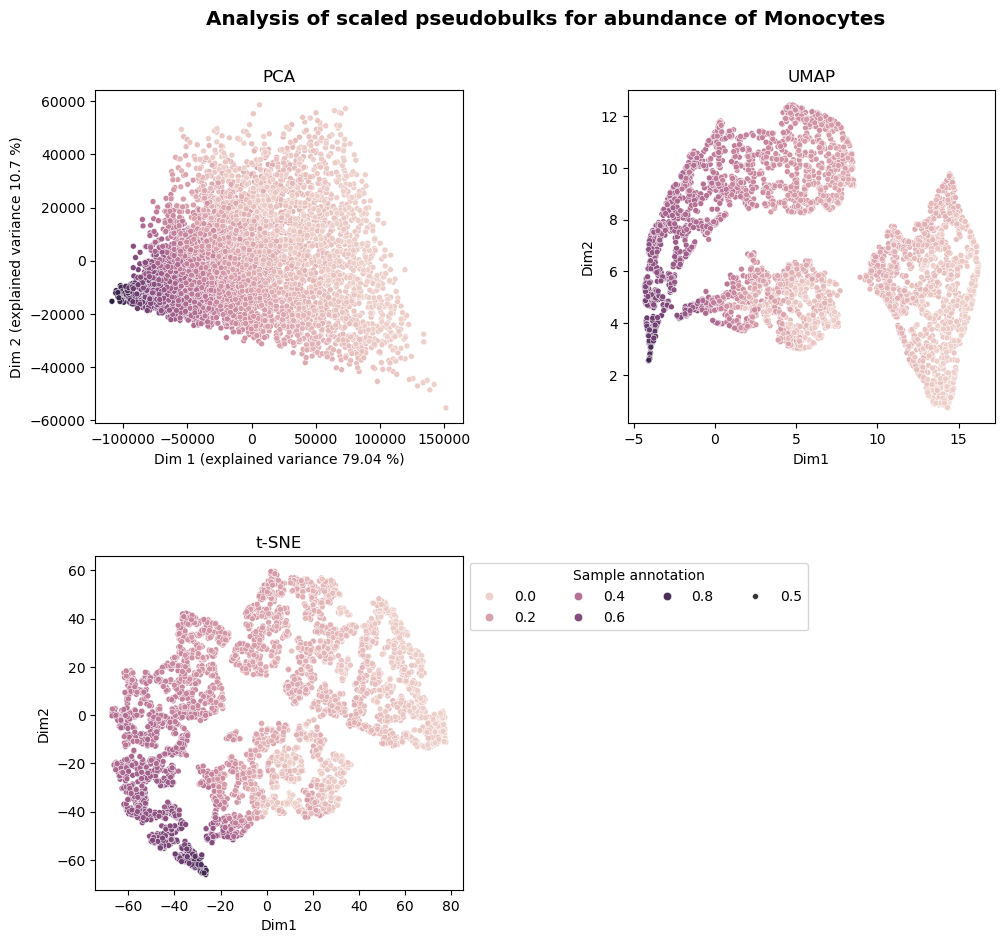

In [15]:
clusterCellTypeAbundance(only3k_scaled, props, 'Monocytes', 'scaled')

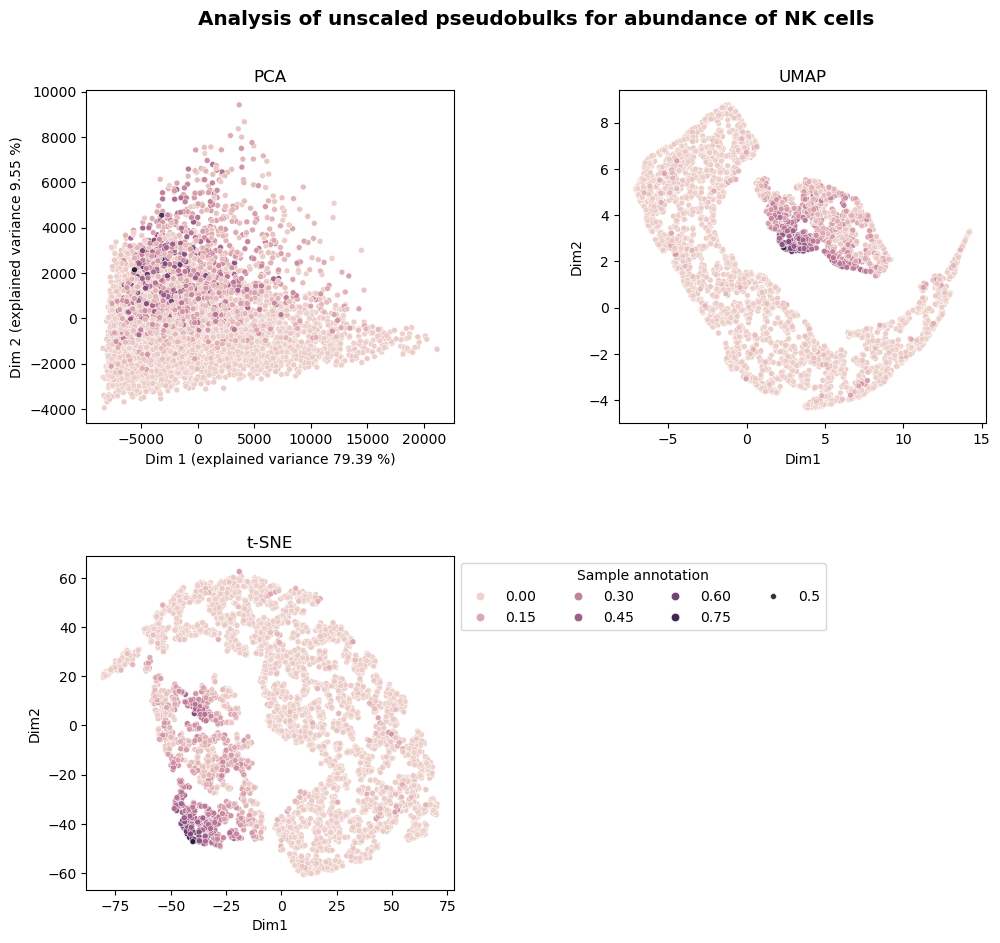

In [16]:
clusterCellTypeAbundance(only3k, props, 'NK cells', 'unscaled')

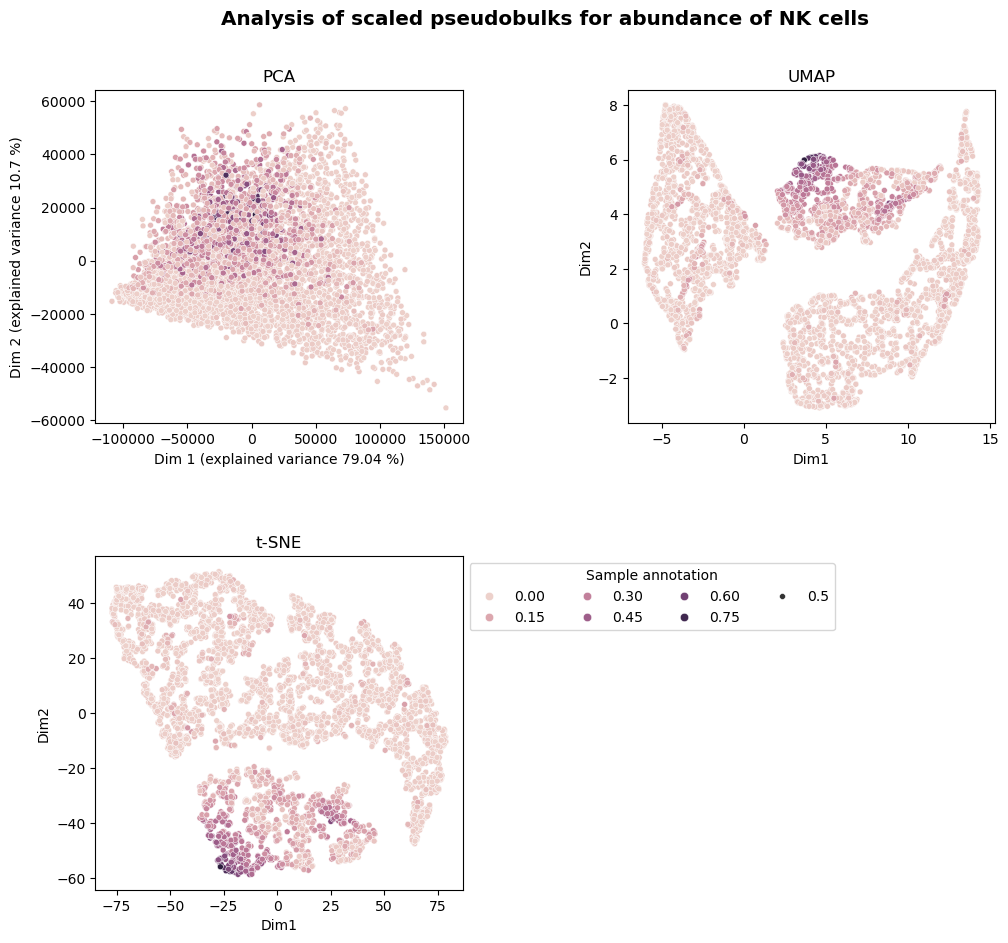

In [17]:
clusterCellTypeAbundance(only3k_scaled, props, 'NK cells', 'scaled')

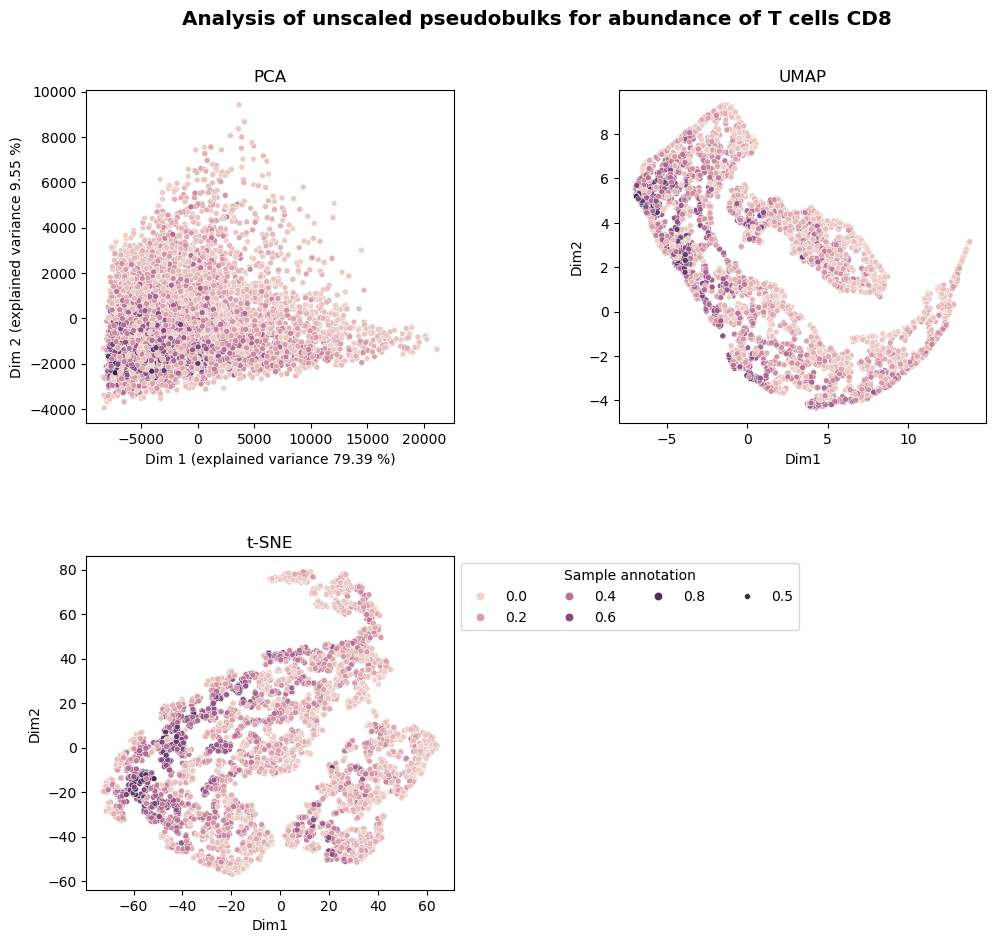

In [18]:
clusterCellTypeAbundance(only3k, props, 'T cells CD8', 'unscaled')

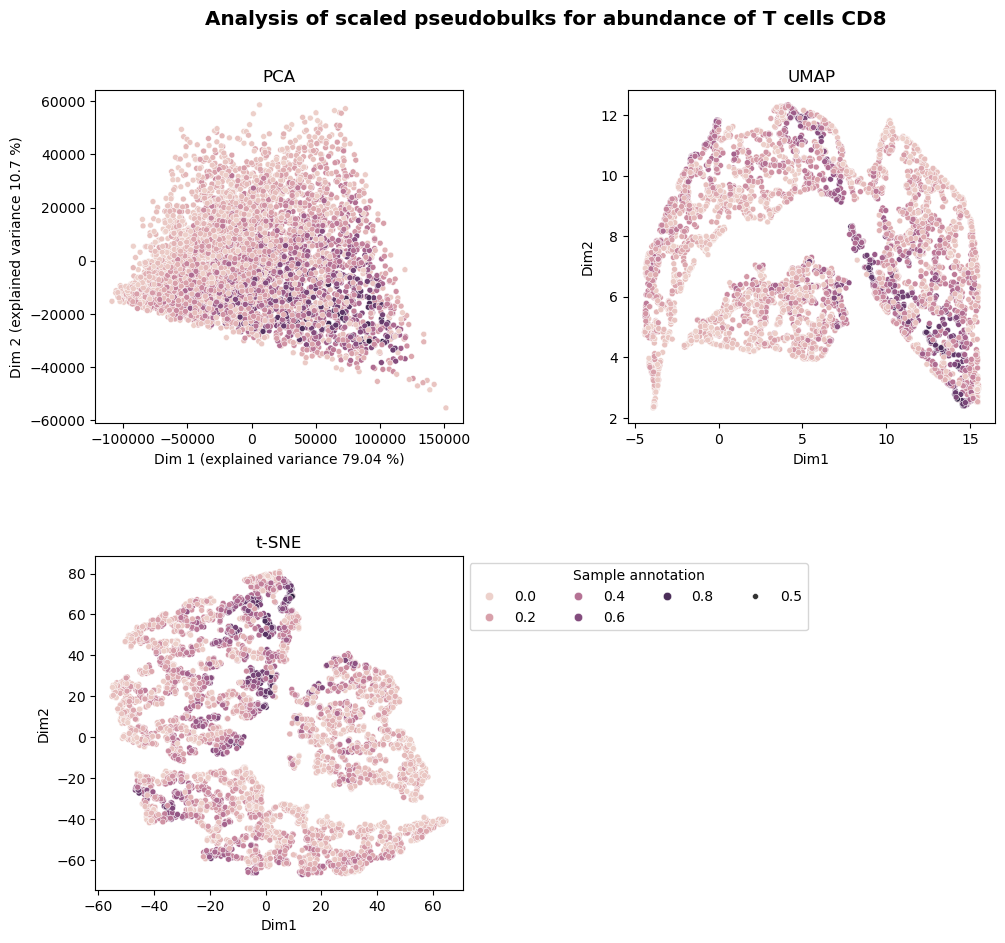

In [19]:
clusterCellTypeAbundance(only3k_scaled, props, 'T cells CD8', 'scaled')

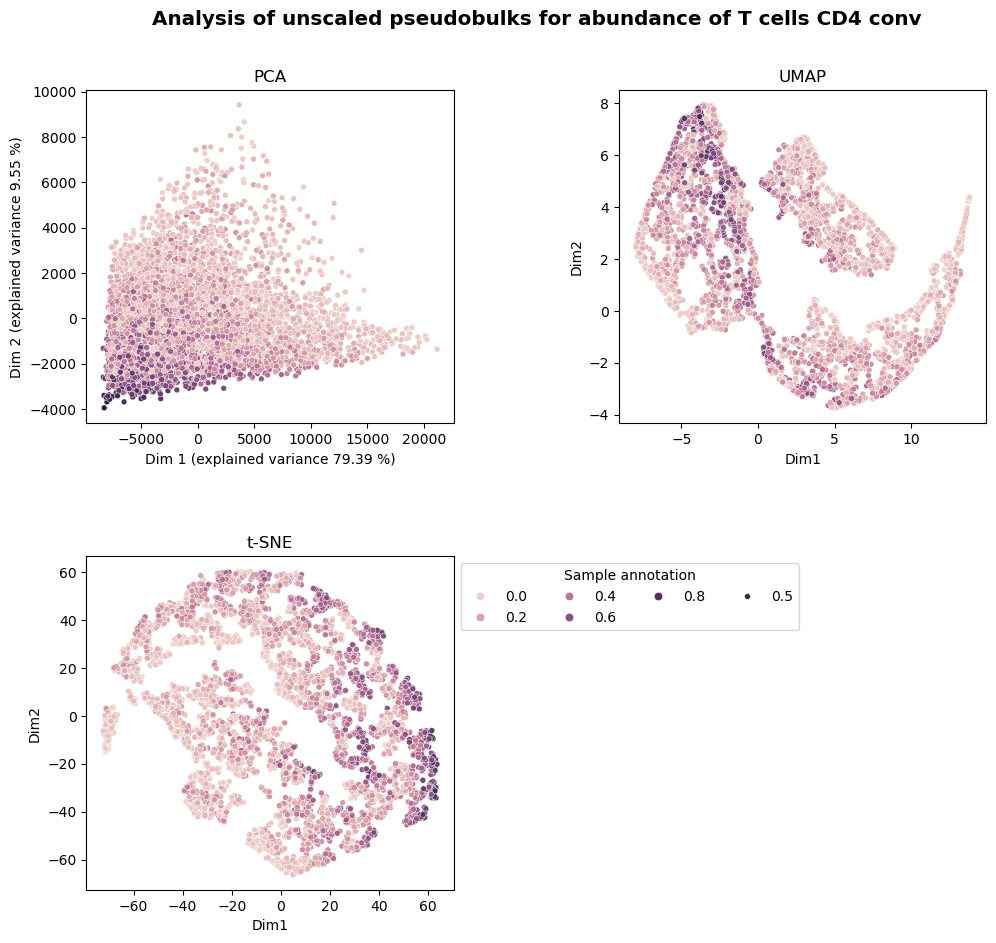

In [20]:
clusterCellTypeAbundance(only3k, props, 'T cells CD4 conv', 'unscaled')

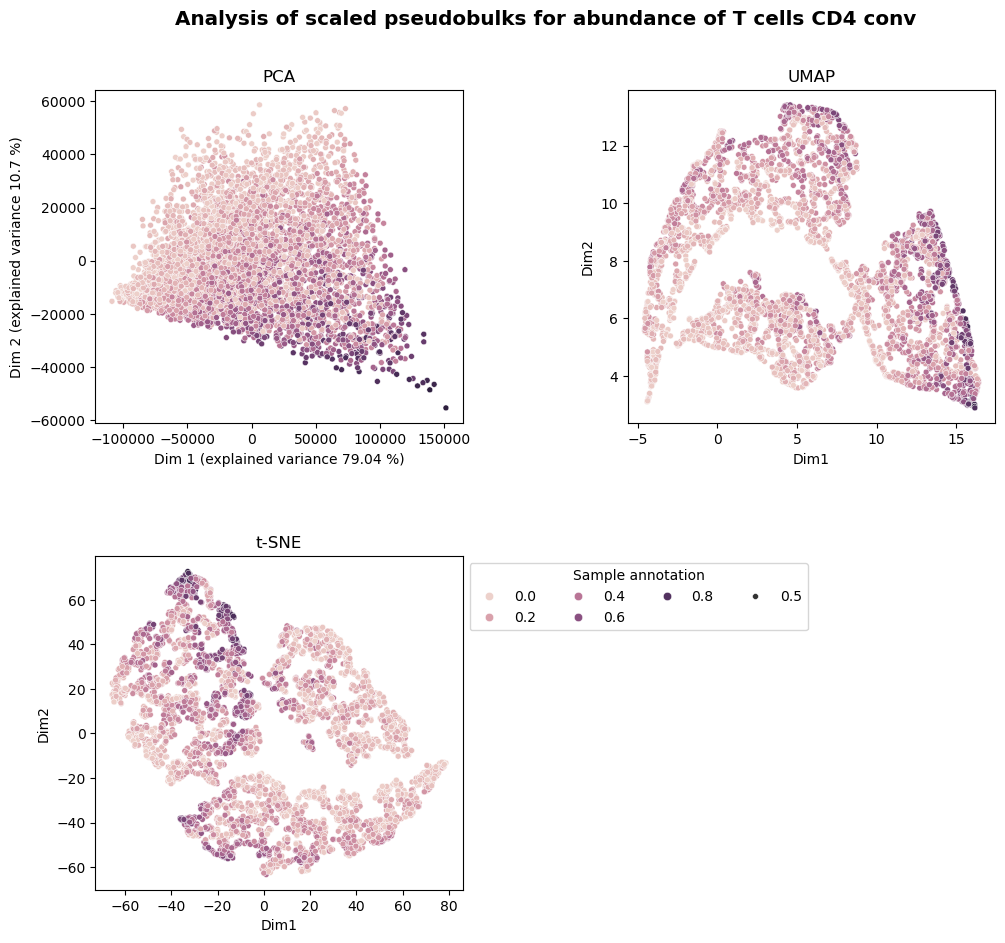

In [21]:
clusterCellTypeAbundance(only3k_scaled, props, 'T cells CD4 conv', 'scaled')

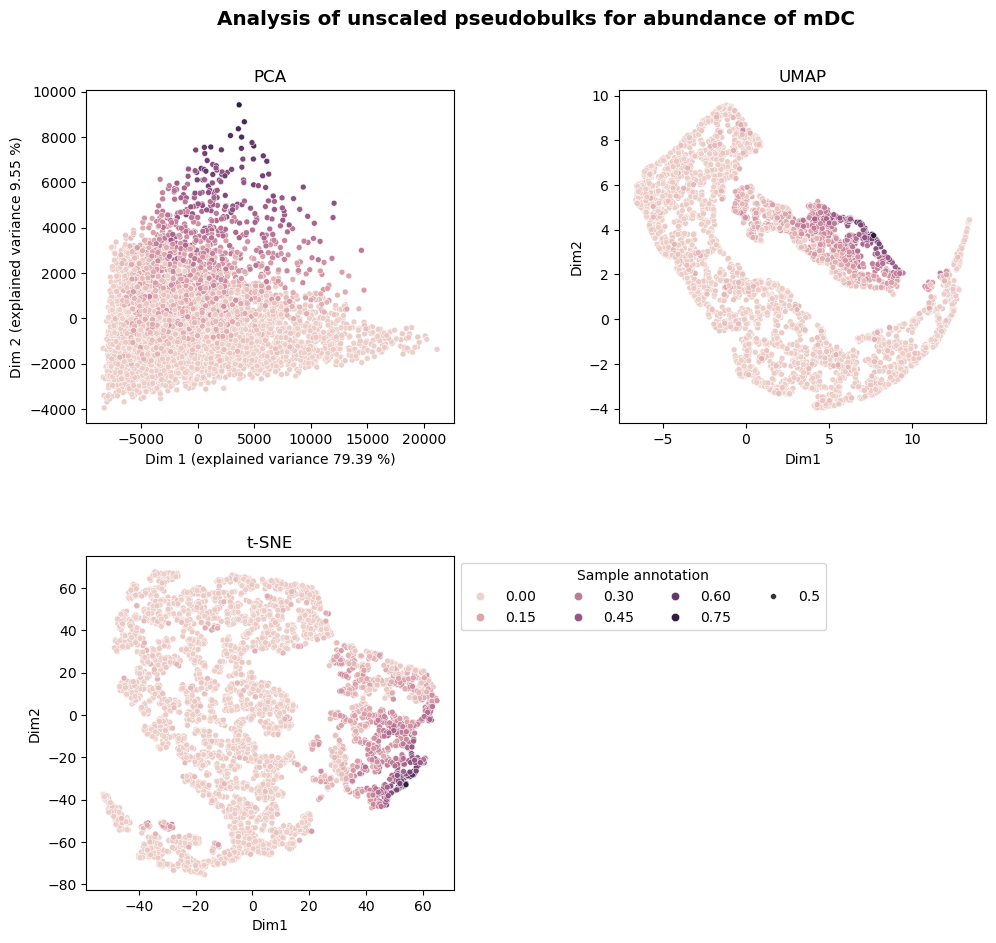

In [22]:
clusterCellTypeAbundance(only3k, props, 'mDC', 'unscaled')

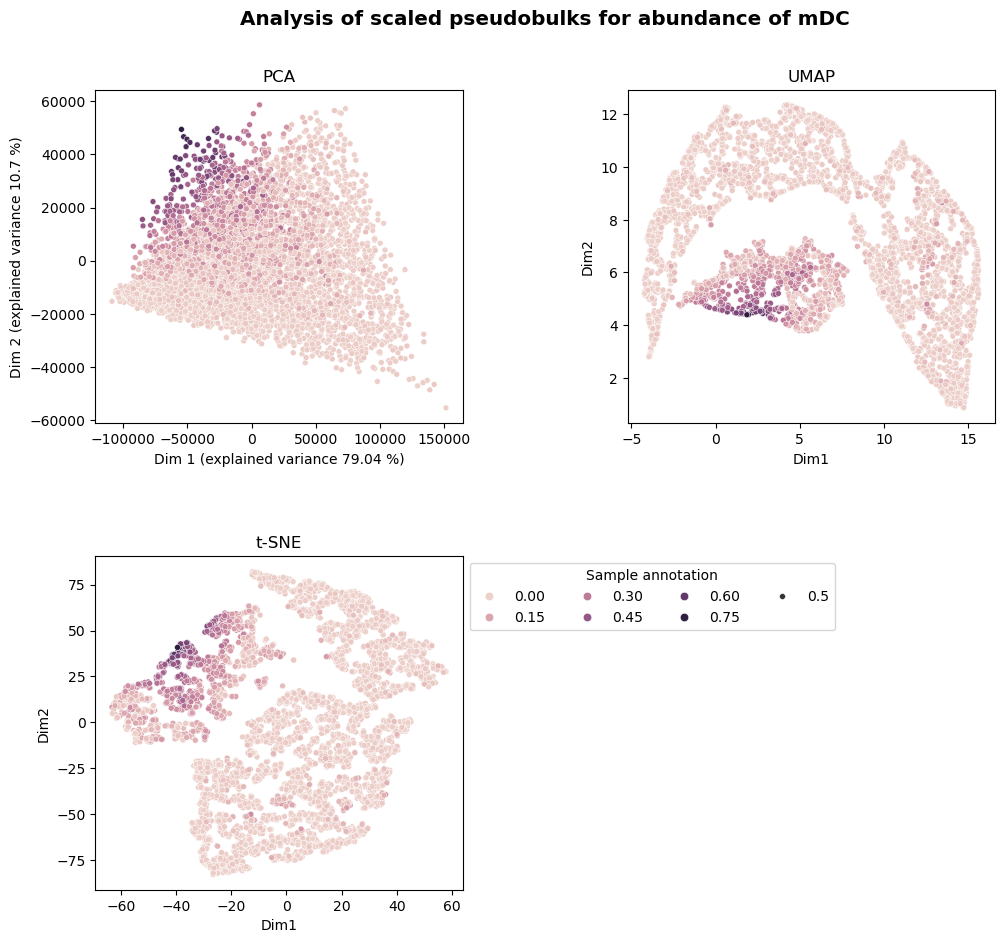

In [23]:
clusterCellTypeAbundance(only3k_scaled, props, 'mDC', 'scaled')